# DNSM: V3 and V4 Difference in Selection Factors 

In [1]:
import os, sys
import itertools
import pandas as pd
import numpy as np
from scipy import stats
from IPython.display import display
from collections import Counter
import pprint

import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

from dnsmex.dms_viz import *
from dnsmex.local import localify

In [2]:
# settings
ROUND_DIGITS = 4
BUILD_CSV = True
REBUILD_CSV = False

COLORS = {
    'dnsm_sf': '#675ed6',
    'rel_asa': '#808080'
}

In [3]:
prefix = "dnsm_v3v4"

In [4]:
# input paths
DNSM_MODELS_DIR = localify("DNSM_TRAINED_MODELS_DIR")
DASM_MODELS_DIR = localify("DASM_TRAINED_MODELS_DIR")
MODELS_DIR = DNSM_MODELS_DIR

SABDAB_DIR = localify("SABDAB_DIR")
PDB_DB_DIR = f'{SABDAB_DIR}/pdb-db'
SABDAB_PATH = f'{SABDAB_DIR}/sabdab_summary_for_dnsm.tsv'
MAX_ASA_PATH = f'{SABDAB_DIR}/max_asa.csv'
DMSVIZ_OUTPUT_DIR = f'{SABDAB_DIR}'
DMSVIZ_TEMP_DIR = f'_temp'

FIGURES_DIR = localify("FIGURES_DIR")
FIGURES_OUTPUT_DIR = f'{FIGURES_DIR}/{prefix}'
OUTPUT_DIR = f'{FIGURES_DIR}/{prefix}'
TEMP_DIR = f'_temp'

print(f"{FIGURES_OUTPUT_DIR=}")

FIGURES_OUTPUT_DIR='/home/drich/shared-data/bcr-mut-sel/output/dnsm_v3v4'


In [5]:
for path in [OUTPUT_DIR, TEMP_DIR, DMSVIZ_OUTPUT_DIR, DMSVIZ_TEMP_DIR]:
    print(f"{path=}")
    os.makedirs(path, exist_ok=True)

path='/home/drich/shared-data/bcr-mut-sel/output/dnsm_v3v4'
path='_temp'
path='/home/drich/shared-data/bcr-mut-sel/sabdab'
path='_temp'


## Load CSV

In [6]:
DNSM_MODEL_NAME = "dnsm_1m-v1jaffe+v1tang-joint"
pdbs_range = None
# pdbs_range = [0, 50]

In [7]:
if BUILD_CSV:
    util = DmsViz_Utility(
        output_dir=DMSVIZ_OUTPUT_DIR,
        sabdab_path=SABDAB_PATH,
        pdb_db_dir=PDB_DB_DIR,
        dnsm_models_dir=DNSM_MODELS_DIR,
        dnsm_model_name=DNSM_MODEL_NAME,
    )
    util.PDB_PARSER_PERMISSIVE = True
    util.PDB_PARSER_QUIET = True
    util.ALWAYS_REBUILD_CSV = REBUILD_CSV
    util.PDBS_RANGE = pdbs_range
    util.update_pdbs_csv_path()
    pdbs_df = util.save_pdbs_table()

pdbs_df already found at: /home/drich/shared-data/bcr-mut-sel/sabdab/pdb-db.dnsm_1m-v1jaffe+v1tang-joint.ALL.csv


/home/drich/matsen-lab/dnsm/dnsm-experiments-1/dnsmex/dms_viz.py:225: DtypeWarning: Columns (12,36,41,42,43,44,45,46,47,48,49,62,77,78,79,80,81,82,83,84,85,92,93,94,100,103,104,108,109,111,112,113,114,115,117,118,119,120,121,123,124,125,127,128,129,130,131,132,133,134,138,139,140,141,142,143,144,154,167,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,233) have mixed types. Specify dtype option on import or set low_memory=False.
  self.pdbs_df = pd.read_csv(self.PDB_CSV_PATH)


In [8]:
util = DmsViz_Utility(
    output_dir=DMSVIZ_OUTPUT_DIR,
    sabdab_path=SABDAB_PATH,
    pdb_db_dir=PDB_DB_DIR,
    dnsm_models_dir=MODELS_DIR,
    dnsm_model_name=DNSM_MODEL_NAME,
)
util.PDBS_RANGE = pdbs_range
util.update_pdbs_csv_path()
init_pdbs_df = util.load_pdbs_table()
display(init_pdbs_df)

/home/drich/matsen-lab/dnsm/dnsm-experiments-1/dnsmex/dms_viz.py:225: DtypeWarning: Columns (12,36,41,42,43,44,45,46,47,48,49,62,77,78,79,80,81,82,83,84,85,92,93,94,100,103,104,108,109,111,112,113,114,115,117,118,119,120,121,123,124,125,127,128,129,130,131,132,133,134,138,139,140,141,142,143,144,154,167,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,233) have mixed types. Specify dtype option on import or set low_memory=False.
  self.pdbs_df = pd.read_csv(self.PDB_CSV_PATH)


,organism,pdbid,abid,v_family,j_family,chain_type,stat,source,imgt_1,imgt_2,...,imgt_120,imgt_121,imgt_122,imgt_122A,imgt_123,imgt_124,imgt_125,imgt_126,imgt_127,imgt_128
0,mouse_ig,12e8,12e8HL,IGHV14,IGHJ3,H,dnsm_sf,opig-chothia,0.8253513,0.59364116,...,0.3971957,0.040973853,0.3065939,NaN,1.0289783,0.3222303,0.6314443,0.08236274,0.53974426,0.72325665
1,mouse_ig,12e8,12e8HL,IGHV14,IGHJ3,H,num,opig-chothia,1,2,...,105,106,107,NaN,108,109,110,111,112,113
2,mouse_ig,12e8,12e8HL,IGHV14,IGHJ3,H,rel_asa,opig-chothia,0.9551569506726457,0.26436781609195403,...,0.4577777777777778,0.10576923076923077,0.011627906976744186,NaN,0.38308457711442784,0.0,0.12790697674418605,0.034482758620689655,0.08387096774193549,0.6124031007751938
3,mouse_ig,12e8,12e8HL,IGHV14,IGHJ3,H,wildtype,opig-chothia,E,V,...,Q,G,T,NaN,L,V,T,V,S,A
4,mouse_ig,12e8,12e8HL,IGHV14,IGHJ3,H,dnsm_sf,opig-imgt,0.8253513,0.59364116,...,0.3971957,0.040973853,0.3065939,NaN,1.0289783,0.3222303,0.6314443,0.08236274,0.53974426,0.72325665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230524,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,dnsm_sf,opig-imgt,NaN,0.44905138,...,1.3429549,0.06391238,0.6963682,NaN,0.7727657,0.0800255,0.777167,0.07075209,0.85237163,NaN
230525,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,num,opig-imgt,NaN,2,...,120,121,122,NaN,123,124,125,126,127,NaN
230526,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,rel_asa,opig-imgt,NaN,0.3793103448275862,...,0.7203389830508474,0.22115384615384615,0.12209302325581395,NaN,0.6511627906976745,0.034482758620689655,0.23255813953488372,0.08620689655172414,0.4774193548387097,NaN
230527,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,wildtype,opig-imgt,NaN,V,...,K,G,T,NaN,T,V,T,V,S,NaN


In [9]:
# filter df to only include human_ig and heavy chain
df = util.pdbs_df
df = df[(df.organism == 'human_ig') & (df.chain_type == 'H')]
df = df.reset_index(drop=True)
pdbs_df = df_remove_index_cols(df)
util.pdbs_df = pdbs_df
display(pdbs_df)

,organism,pdbid,abid,v_family,j_family,chain_type,stat,source,imgt_1,imgt_2,...,imgt_120,imgt_121,imgt_122,imgt_122A,imgt_123,imgt_124,imgt_125,imgt_126,imgt_127,imgt_128
0,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,dnsm_sf,opig-chothia,0.7742865,0.3843502,...,0.95167136,0.022909729,1.0580907,NaN,0.6930641,0.23009287,0.39667028,0.07116217,0.24926677,1.2440267
1,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,num,opig-chothia,1,2,...,105,106,107,NaN,108,109,110,111,112,113
2,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,rel_asa,opig-chothia,0.8161434977578476,0.15517241379310345,...,0.7644444444444445,0.23076923076923078,0.10465116279069768,NaN,0.23880597014925373,0.0,0.13372093023255813,0.05747126436781609,0.1935483870967742,0.567741935483871
3,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,wildtype,opig-chothia,E,V,...,Q,G,T,NaN,L,V,T,V,S,S
4,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,dnsm_sf,opig-imgt,0.7742865,0.3843502,...,0.95167136,0.022909729,1.0580907,NaN,0.6930641,0.23009287,0.39667028,0.07116217,0.24926677,1.2440267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76408,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,dnsm_sf,opig-imgt,NaN,0.44905138,...,1.3429549,0.06391238,0.6963682,NaN,0.7727657,0.0800255,0.777167,0.07075209,0.85237163,NaN
76409,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,num,opig-imgt,NaN,2,...,120,121,122,NaN,123,124,125,126,127,NaN
76410,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,rel_asa,opig-imgt,NaN,0.3793103448275862,...,0.7203389830508474,0.22115384615384615,0.12209302325581395,NaN,0.6511627906976745,0.034482758620689655,0.23255813953488372,0.08620689655172414,0.4774193548387097,NaN
76411,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,wildtype,opig-imgt,NaN,V,...,K,G,T,NaN,T,V,T,V,S,NaN


In [10]:
# select data source
all_data_sources = ["rcsb", "opig-imgt", "opig-chothia"]
source_dict = {
  "num": "opig-imgt",
  "wildtype": "opig-imgt",
  "rel_asa": "opig-imgt",
  "dnsm_sf": "opig-imgt"
}
selected_stats = [f"{value}::{key}" for key,value in source_dict.items()]

df = util.pdbs_df
df["source_stat"] = [f"{x}::{y}" for x,y in zip(df["source"],df["stat"])]
df = df[df.source_stat.isin(tuple(selected_stats))]

util.pdbs_df = df
pdbs_df = util.pdbs_df
display(pdbs_df)

,organism,pdbid,abid,v_family,j_family,chain_type,stat,source,imgt_1,imgt_2,...,imgt_121,imgt_122,imgt_122A,imgt_123,imgt_124,imgt_125,imgt_126,imgt_127,imgt_128,source_stat
4,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,dnsm_sf,opig-imgt,0.7742865,0.3843502,...,0.022909729,1.0580907,NaN,0.6930641,0.23009287,0.39667028,0.07116217,0.24926677,1.2440267,opig-imgt::dnsm_sf
5,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,num,opig-imgt,1,2,...,121,122,NaN,123,124,125,126,127,128,opig-imgt::num
6,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,rel_asa,opig-imgt,0.8161434977578476,0.15517241379310345,...,0.23076923076923078,0.10465116279069768,NaN,0.23880597014925373,0.0,0.13372093023255813,0.05747126436781609,0.1935483870967742,0.567741935483871,opig-imgt::rel_asa
7,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,wildtype,opig-imgt,E,V,...,G,T,NaN,L,V,T,V,S,S,opig-imgt::wildtype
16,human_ig,1ad0,1ad0DC,IGHV3,IGHJ4,H,dnsm_sf,opig-imgt,0.7742865,0.3843502,...,0.022909729,1.0580907,NaN,0.6930641,0.23009287,0.39667028,0.07116217,0.24926677,1.2440267,opig-imgt::dnsm_sf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76399,human_ig,8ttw,8ttwKL,IGHV4,unknown,H,wildtype,opig-imgt,Q,I,...,G,T,NaN,L,I,S,V,S,A,opig-imgt::wildtype
76408,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,dnsm_sf,opig-imgt,NaN,0.44905138,...,0.06391238,0.6963682,NaN,0.7727657,0.0800255,0.777167,0.07075209,0.85237163,NaN,opig-imgt::dnsm_sf
76409,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,num,opig-imgt,NaN,2,...,121,122,NaN,123,124,125,126,127,NaN,opig-imgt::num
76410,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,rel_asa,opig-imgt,NaN,0.3793103448275862,...,0.22115384615384615,0.12209302325581395,NaN,0.6511627906976745,0.034482758620689655,0.23255813953488372,0.08620689655172414,0.4774193548387097,NaN,opig-imgt::rel_asa


## Inspect V3/V4 Families

In [11]:
# v families
v_fams = set()
for v_fam_list in set(pdbs_df.v_family):
    for v_fam in v_fam_list.split(","):
        v_fams.add(v_fam)
print(f'v_fams: {v_fams}')

v_fams: {'IGHV4', 'IGHV14', 'unknown', 'IGHV9', 'IGHV1', 'IGHV6', 'IGHV7', 'IGHV8', 'IGHV3', 'IGHV2', 'IGHV5'}


In [12]:
# build set of v3 pdbids
v3_df = pdbs_df
print(f"all_pdbs: count={len(set(v3_df.pdbid))}")
v3_df = v3_df[v3_df["v_family"].str.contains("IGHV3", case=True, na=False)]
print(f"v3_pdbs: count={len(set(v3_df.pdbid))}")
v3_handler = DmsViz_Table(v3_df)
v3_handler.get_cdr_length_counts()
v3_df = v3_handler.df
v3_df = v3_df[(v3_df["CDR3_len"] >= 10) & (v3_df["CDR3_len"] <= 12)]
v3_set = sorted(list(set(v3_df.pdbid)))
print(f"v3_pdbs w/ 10-12 AAs in CDR3: count={len(v3_set)}")
display(v3_df)
print(f"v3_set: {len(v3_set)} {v3_set}\n")

all_pdbs: count=3151
v3_pdbs: count=1444
v3_pdbs w/ 10-12 AAs in CDR3: count=352


,organism,pdbid,abid,v_family,j_family,chain_type,stat,source,source_stat,CDR1_len,...,imgt_120,imgt_121,imgt_122,imgt_122A,imgt_123,imgt_124,imgt_125,imgt_126,imgt_127,imgt_128
4,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,dnsm_sf,opig-imgt,opig-imgt::dnsm_sf,8,...,0.95167136,0.022909729,1.0580907,NaN,0.6930641,0.23009287,0.39667028,0.07116217,0.24926677,1.2440267
5,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,num,opig-imgt,opig-imgt::num,8,...,120,121,122,NaN,123,124,125,126,127,128
6,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,rel_asa,opig-imgt,opig-imgt::rel_asa,8,...,0.7644444444444445,0.23076923076923078,0.10465116279069768,NaN,0.23880597014925373,0.0,0.13372093023255813,0.05747126436781609,0.1935483870967742,0.567741935483871
7,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,wildtype,opig-imgt,opig-imgt::wildtype,8,...,Q,G,T,NaN,L,V,T,V,S,S
16,human_ig,1ad0,1ad0DC,IGHV3,IGHJ4,H,dnsm_sf,opig-imgt,opig-imgt::dnsm_sf,8,...,0.95167136,0.022909729,1.0580907,NaN,0.6930641,0.23009287,0.39667028,0.07116217,0.24926677,1.2440267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74719,human_ig,8jnr,8jnrJN,IGHV3,unknown,H,wildtype,opig-imgt,opig-imgt::wildtype,8,...,Q,G,T,NaN,L,V,T,V,S,S
75868,human_ig,8t7g,8t7gAB,IGHV3,unknown,H,dnsm_sf,opig-imgt,opig-imgt::dnsm_sf,8,...,0.7997131,0.024304582,0.45696926,NaN,0.9072825,0.18780388,0.6735343,0.08763754,0.33604947,1.0986993
75869,human_ig,8t7g,8t7gAB,IGHV3,unknown,H,num,opig-imgt,opig-imgt::num,8,...,120,121,122,NaN,123,124,125,126,127,128
75870,human_ig,8t7g,8t7gAB,IGHV3,unknown,H,rel_asa,opig-imgt,opig-imgt::rel_asa,8,...,0.5066666666666667,0.125,0.13953488372093023,NaN,0.21890547263681592,0.0,0.08139534883720931,0.04597701149425287,0.2,0.5548387096774193


v3_set: 352 ['1ad0', '1jps', '1jpt', '1l7i', '2hff', '2qr0', '2vxs', '2wub', '2wuc', '2ybr', '2yc1', '3eyo', '3eyq', '3f12', '3gje', '3gjf', '3hae', '3k2u', '3kyk', '3kym', '3m8o', '3n85', '3qnx', '3qo0', '3qo1', '3qos', '3r1g', '3tnn', '3u30', '4cni', '4dkf', '4g5z', '4g6a', '4g6j', '4g7v', '4g7y', '4h8w', '4llu', '4llw', '4lly', '4mxv', '4mxw', '4oqt', '4p59', '4pub', '4rrp', '4tsa', '4tsb', '4tsc', '4ttd', '4v1d', '4xgz', '4xh2', '4y5v', '4y5y', '4z5r', '5bvj', '5bvp', '5csz', '5cus', '5d1q', '5d1x', '5dwu', '5ea0', '5ezi', '5ezj', '5f45', '5f6h', '5f6i', '5f6j', '5fgb', '5grv', '5gs1', '5hhv', '5hhx', '5hi3', '5hi4', '5hi5', '5i15', '5i19', '5i1a', '5i1c', '5i1d', '5i1e', '5i1g', '5i1h', '5i1i', '5ihz', '5ik3', '5mes', '5mev', '5tru', '5ucb', '5uea', '5uek', '5uoe', '5v7r', '5veb', '5vsh', '5vz1', '5w4l', '5wcc', '5wuv', '5wux', '5x8l', '5xj3', '5xxy', '6axl', '6ayz', '6az2', '6b6z', '6bhz', '6df1', '6dkj', '6dn0', '6e63', '6e65', '6ele', '6ell', '6emj', '6fgb', '6foe', '6iec', '6j

In [13]:
# build set of v4 pdbids
v4_df = pdbs_df
print(f"all_pdbs: count={len(set(v4_df.pdbid))}")
v4_df = v4_df[v4_df["v_family"].str.contains("IGHV4", case=True, na=False)]
print(f"v4_pdbs: count={len(set(v4_df.pdbid))}")
v4_handler = DmsViz_Table(v4_df)
v4_handler.get_cdr_length_counts()
v4_df = v4_handler.df
v4_df = v4_df[(v4_df["CDR3_len"] >= 10) & (v4_df["CDR3_len"] <= 12)]
v4_set = sorted(list(set(v4_df.pdbid)))
print(f"v4_pdbs w/ 10-12 AAs in CDR3: count={len(v4_set)}")
display(v4_df)
print(f"v4_set: {len(v4_set)} {v4_set}\n")

all_pdbs: count=3151
v4_pdbs: count=451
v4_pdbs w/ 10-12 AAs in CDR3: count=72


,organism,pdbid,abid,v_family,j_family,chain_type,stat,source,source_stat,CDR1_len,...,imgt_120,imgt_121,imgt_122,imgt_122A,imgt_123,imgt_124,imgt_125,imgt_126,imgt_127,imgt_128
112,human_ig,1bey,1beyHL,IGHV4,IGHJ4,H,dnsm_sf,opig-imgt,opig-imgt::dnsm_sf,8,...,0.9784554,0.044308815,0.672637,NaN,1.015659,0.22192,0.429592,0.077355005,0.368691,1.2482792
113,human_ig,1bey,1beyHL,IGHV4,IGHJ4,H,num,opig-imgt,opig-imgt::num,8,...,120,121,122,NaN,123,124,125,126,127,128
114,human_ig,1bey,1beyHL,IGHV4,IGHJ4,H,rel_asa,opig-imgt,opig-imgt::rel_asa,8,...,0.5822222222222222,0.33653846153846156,0.12258064516129032,NaN,0.15920398009950248,0.0,0.16279069767441862,0.07471264367816093,0.12258064516129032,0.6903225806451613
115,human_ig,1bey,1beyHL,IGHV4,IGHJ4,H,wildtype,opig-imgt,opig-imgt::wildtype,8,...,Q,G,S,NaN,L,V,T,V,S,S
124,human_ig,1bvk,1bvkBA,IGHV4,IGHJ4,H,dnsm_sf,opig-imgt,opig-imgt::dnsm_sf,8,...,1.0131083,0.044615436,0.6257255,NaN,1.1062379,0.11108565,0.5782012,0.058008537,0.5930231,1.1015214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75607,human_ig,8szy,8szyAB,"IGHV1,IGHV4",unknown,H,wildtype,opig-imgt,opig-imgt::wildtype,8,...,Q,G,T,NaN,S,V,S,V,S,S
75616,human_ig,8szy,8szyCD,"IGHV1,IGHV4",unknown,H,dnsm_sf,opig-imgt,opig-imgt::dnsm_sf,8,...,0.5934491,0.04826665,0.37827343,NaN,0.40054625,0.14096548,0.5069759,0.06368469,0.9621651,1.1842213
75617,human_ig,8szy,8szyCD,"IGHV1,IGHV4",unknown,H,num,opig-imgt,opig-imgt::num,8,...,120,121,122,NaN,123,124,125,126,127,128
75618,human_ig,8szy,8szyCD,"IGHV1,IGHV4",unknown,H,rel_asa,opig-imgt,opig-imgt::rel_asa,8,...,0.5111111111111111,0.125,0.005813953488372093,NaN,0.38064516129032255,0.011494252873563218,0.1870967741935484,0.04597701149425287,0.15483870967741936,0.5741935483870968


v4_set: 72 ['1bey', '1bvk', '2vxq', '2xza', '2xzc', '3zl4', '4g6a', '4g6k', '4g6m', '4hs6', '4lkx', '4qhk', '4r7d', '4r7n', '4rnr', '5c6t', '5ezi', '5ezj', '5gkr', '5gks', '5gzo', '5k59', '5sx4', '5sx5', '5xwd', '6ch9', '6dfi', '6dfj', '6ele', '6ell', '6emj', '6i04', '6ieb', '6iut', '6k0y', '6phb', '6q1a', '6r2s', '6wyt', '6y1k', '6y1l', '6y1n', '6z3k', '6z3q', '7bq5', '7bxa', '7ce2', '7cgw', '7fab', '7kn4', '7kqe', '7l7r', '7lyv', '7m30', '7m7b', '7mrz', '7mxl', '7n4m', '7oh0', '7oly', '7ox3', '7ps6', '7q0h', '7sts', '7vsu', '7vsw', '7zfa', '8bbo', '8bcz', '8ee1', '8eoo', '8szy']



In [14]:
# examine pdbs containing site positions
pos_aa_dict = {
  8: 'G',
  9: 'G',
  16: 'G',
  119: 'G',
  121: 'G',
  126: 'V',
}

df = v3_df[v3_df.stat == 'wildtype'].copy()
df.dropna(axis=1, how='all')
cols_to_remove = []
for col in df.columns:
    if col.startswith('imgt') and DmsViz_Utility.imgt_label_to_number(col) > 129:
        cols_to_remove.append(col)
df.drop(cols_to_remove, axis=1, inplace=True)

for pos,aa in pos_aa_dict.items():
    df = df[df[f'imgt_{pos}'] == aa]

cols_to_remove = []
for col in df.columns:
    if col.startswith('imgt') and (DmsViz_Utility.imgt_label_to_number(col) not in pos_aa_dict.keys()):
        cols_to_remove.append(col)
df.drop(cols_to_remove, axis=1, inplace=True)

# display(df)
test_v3_pdbids = sorted(list(set(df.pdbid)))
print(f'test_v3_pdbids: {len(test_v3_pdbids)}')
for i,pdbid in enumerate(test_v3_pdbids):
    print(f'{pdbid}', end=' ')
    if (i+1) % 20 == 0:
        print()
print()

test_v3_pdbids: 337
1ad0 1jps 1jpt 1l7i 2hff 2qr0 2vxs 2wub 2wuc 2ybr 2yc1 3eyo 3eyq 3f12 3gje 3gjf 3hae 3k2u 3kym 3m8o 
3n85 3qnx 3qo0 3qo1 3qos 3r1g 3tnn 3u30 4cni 4dkf 4g5z 4g6j 4g7v 4g7y 4h8w 4llu 4llw 4lly 4mxv 4mxw 
4oqt 4p59 4pub 4rrp 4tsa 4tsb 4tsc 4ttd 4v1d 4xgz 4xh2 4y5v 4y5y 4z5r 5bvj 5bvp 5csz 5cus 5dwu 5ea0 
5ezi 5ezj 5f45 5f6h 5f6i 5f6j 5grv 5gs1 5hhv 5hhx 5hi3 5hi4 5hi5 5i19 5i1a 5i1c 5i1d 5i1e 5i1g 5i1h 
5i1i 5ihz 5ik3 5mes 5mev 5tru 5ucb 5uea 5uek 5uoe 5v7r 5veb 5vsh 5vz1 5w4l 5wcc 5wuv 5wux 5x8l 5xj3 
5xxy 6axl 6ayz 6az2 6b6z 6bhz 6df1 6dkj 6dn0 6e63 6e65 6ele 6ell 6emj 6fgb 6foe 6jc2 6jjp 6ktr 6lun 
6nms 6nmu 6nuz 6nv0 6o1f 6oge 6pzf 6qb6 6qbc 6rp8 6txz 6u02 6u36 6u38 6u8c 6uj9 6vca 6wds 6wfz 6wg1 
6wgj 6wjl 6xc2 6xc3 6xc4 6xc7 6xca 6xcm 6xcn 6xe1 7arn 7b3o 7bei 7bej 7bek 7bem 7cdi 7cdj 7ch4 7ch5 
7chb 7chc 7che 7chf 7chp 7chs 7cjf 7ctu 7cu4 7cu7 7cwl 7cwm 7cwn 7cwo 7cwu 7czt 7d0c 7d6i 7e39 7e3c 
7e5r 7e5s 7e5y 7e86 7e88 7e8c 7e8f 7e8m 7ejy 7ejz 7ek0 7elx 7f3q 7f6y 7

## Make DMS-Viz JSONs

In [15]:
# plot an aligned df (dataframe with required imgt_col and imgt_num columns)
def plot_aligned_df(
    align_df,
    title,
    y_label="DNSM Selection Factor",
    metric_dict=[],
    palette='husl',
    width=12,
    all_imgt_labels=False,
    shade_cdr_regions=True,
    output_path=None
):
    plt.figure(figsize=(width, 4))
    colors = DmsViz_Utility.get_color_palette(len(metric_dict), palette)

    align_df["imgt_num_padded"] = DmsViz_Table.get_padded_imgt_nums(align_df["imgt_col"], align_df["imgt_num"])
    imgt_cols = list(align_df["imgt_col"])
    imgt_nums = list(align_df["imgt_num"])
    imgt_nums_padded = list(align_df["imgt_num_padded"])

    x_labels = imgt_cols
    # x_ticks = imgt_nums
    x_ticks = imgt_nums_padded

    for i,(metric_label,metric) in enumerate(metric_dict.items()):
        sns.lineplot(x="imgt_num_padded", y=metric, data=align_df, label=metric_label, color=colors[i], marker='o')

    if all_imgt_labels:
        if x_ticks[0] > DmsViz_Utility.MIN_NUM_SCHEME - 1:
            x_ticks.insert(0, DmsViz_Utility.MIN_NUM_SCHEME - 1)
            x_labels.insert(0, f'imgt_{DmsViz_Utility.MIN_NUM_SCHEME - 1}')
        if x_ticks[-1] < DmsViz_Utility.MAX_NUM_SCHEME + 1:
            x_ticks.append(DmsViz_Utility.MAX_NUM_SCHEME + 1)
            x_labels.append(f'imgt_{DmsViz_Utility.MAX_NUM_SCHEME + 1}')
        x_ticks_final = []
        x_labels_final = []
        prv_x_tick = 0
        for x_tick,x_label in zip(x_ticks,x_labels):
            if math.isnan(x_tick):
                continue
            # x_tick = int(x_tick.rstrip('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))
            x_tick = int(x_tick)
            if x_tick - prv_x_tick > 1:
                for i in range(prv_x_tick+1,x_tick):
                    x_ticks_final.append(i)
                    x_labels_final.append(f'imgt_{i}')
            x_ticks_final.append(x_tick)
            x_labels_final.append(x_label)
            prv_x_tick = x_tick
        x_ticks = x_ticks_final
        x_labels = x_labels_final

    if shade_cdr_regions:
        for cdr_name,(x_beg,x_end) in DmsViz_Utility.CDR_REGIONS.items():
            x_beg = imgt_nums_padded[imgt_cols.index(f'imgt_{x_beg}')]
            x_end = imgt_nums_padded[imgt_cols.index(f'imgt_{x_end}')]
            plt.axvspan(x_beg, x_end, color='gray', alpha=0.2)
            # plt.fill_between(x_beg, x_end+1, color='gray', alpha=0.2)
            x_center = x_beg + (x_end - x_beg)/2.0
            y_top = (plt.ylim()[1] * 0.95)
            plt.text(x_center, y_top, f'{cdr_name}', ha='center', va='top', fontsize=12, color='black')

    x_labels = [x.replace('imgt_','') for x in x_labels]
    plt.xticks(x_ticks, x_labels, rotation=90, fontsize=9)
    plt.xlim = [DmsViz_Utility.MIN_NUM_SCHEME - 1, DmsViz_Utility.MAX_NUM_SCHEME + 1]
    plt.title(title)
    plt.xlabel("IMGT Number")
    plt.ylabel(y_label)
    plt.grid()
    plt.minorticks_on()
    plt.gca().set_xticks(range(DmsViz_Utility.MIN_NUM_SCHEME - 1, DmsViz_Utility.MAX_NUM_SCHEME + 2, 1), minor=True)
    plt.tight_layout()
    plt.legend()

    if output_path != None:
        print(f"figure saved to: {output_path}")
        plt.savefig(output_path)

    plt.show()
    plt.clf()
    return

In [16]:
# get abids from pdbid sets
v3_abids = sorted(list(set(pdbs_df[pdbs_df.abid.str.startswith(tuple(v3_set))].abid)))
print(f'v3_abid: {len(v3_abids)} {v3_abids}')

v4_abids = sorted(list(set(pdbs_df[pdbs_df.abid.str.startswith(tuple(v4_set))].abid)))
print(f'v4_abid: {len(v4_abids)} {v4_abids}')

v3_abid: 745 ['1ad0BA', '1ad0DC', '1jpsHL', '1jptHL', '1l7iHL', '2hffBA', '2hffHL', '2qr0BA', '2qr0FE', '2qr0HG', '2qr0LK', '2qr0NM', '2qr0RQ', '2qr0TS', '2qr0XW', '2vxsHL', '2vxsIM', '2vxsJN', '2vxsKO', '2wubHL', '2wubRQ', '2wucHL', '2ybrAB', '2ybrDE', '2ybrGH', '2yc1AB', '2yc1DE', '3eyoBA', '3eyoDC', '3eyqDC', '3f12BA', '3f12DC', '3gjeBA', '3gjeHL', '3gjfHL', '3gjfMK', '3haeHL', '3haeIG', '3haeON', '3haeTS', '3k2uHL', '3kykHL', '3kymBA', '3kymDC', '3kymFE', '3kymHG', '3kymJI', '3kymLK', '3kymNM', '3kymPO', '3m8oHL', '3n85HL', '3qnxBA', '3qo0BA', '3qo1BA', '3qosBA', '3qosHL', '3r1gHL', '3tnnAB', '3tnnCD', '3tnnEF', '3tnnHL', '3u30CB', '3u30FE', '4cniAB', '4cniHL', '4dkfHL', '4dkfIM', '4g5zHL', '4g6aCD', '4g6aHL', '4g6jHL', '4g7vHL', '4g7yHL', '4h8wHL', '4lluAB', '4lluCD', '4llwAB', '4llwCD', '4llyAB', '4llyCD', '4mxvFE', '4mxvHL', '4mxvYX', '4mxwHL', '4mxwWV', '4oqtHL', '4p59HL', '4pubHL', '4rrpGA', '4rrpHB', '4rrpIC', '4rrpJD', '4rrpKE', '4rrpLF', '4tsaHL', '4tsbHL', '4tscHL', '4ttdC

In [17]:
# build single pdbid dms_viz jsons
abid = v3_abids[0]
print(f"abid: {abid}")
pdbs_table = DmsViz_Table(pdbs_df)
dnsm_df = pdbs_table.make_dnsm_viz_json(
    abid=abid,
    temp_dir=f"{TEMP_DIR}",
    output_path=f"{OUTPUT_DIR}/{abid}.dms_viz.json",
)
display(dnsm_df)

abid: 1ad0BA
Outputting csv: "_temp/1ad0BA.metric.dnsm_sf.csv"
Outputting csv: "_temp/1ad0BA.sitemap.csv"
COMMAND successful!
Outputting json: "/home/drich/shared-data/bcr-mut-sel/output/dnsm_v3v4/1ad0BA.dms_viz.json"


,wildtype,site,mutant,DNSM
0,E,1,-,0.7742865
1,V,2,-,0.3843502
2,Q,3,-,0.5586299
3,L,4,-,0.21484719
4,L,5,-,0.6032313
...,...,...,...,...
116,V,117,-,0.23009287
117,T,118,-,0.39667028
118,V,119,-,0.07116217
119,S,120,-,0.24926677


In [18]:
pdbs_table = DmsViz_Table(pdbs_df)
display(pdbs_table.df)

,organism,pdbid,abid,v_family,j_family,chain_type,stat,source,source_stat,imgt_1,...,imgt_120,imgt_121,imgt_122,imgt_122A,imgt_123,imgt_124,imgt_125,imgt_126,imgt_127,imgt_128
4,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,dnsm_sf,opig-imgt,opig-imgt::dnsm_sf,0.7742865,...,0.95167136,0.022909729,1.0580907,NaN,0.6930641,0.23009287,0.39667028,0.07116217,0.24926677,1.2440267
5,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,num,opig-imgt,opig-imgt::num,1,...,120,121,122,NaN,123,124,125,126,127,128
6,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,rel_asa,opig-imgt,opig-imgt::rel_asa,0.8161434977578476,...,0.7644444444444445,0.23076923076923078,0.10465116279069768,NaN,0.23880597014925373,0.0,0.13372093023255813,0.05747126436781609,0.1935483870967742,0.567741935483871
7,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,wildtype,opig-imgt,opig-imgt::wildtype,E,...,Q,G,T,NaN,L,V,T,V,S,S
16,human_ig,1ad0,1ad0DC,IGHV3,IGHJ4,H,dnsm_sf,opig-imgt,opig-imgt::dnsm_sf,0.7742865,...,0.95167136,0.022909729,1.0580907,NaN,0.6930641,0.23009287,0.39667028,0.07116217,0.24926677,1.2440267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76399,human_ig,8ttw,8ttwKL,IGHV4,unknown,H,wildtype,opig-imgt,opig-imgt::wildtype,Q,...,Q,G,T,NaN,L,I,S,V,S,A
76408,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,dnsm_sf,opig-imgt,opig-imgt::dnsm_sf,NaN,...,1.3429549,0.06391238,0.6963682,NaN,0.7727657,0.0800255,0.777167,0.07075209,0.85237163,NaN
76409,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,num,opig-imgt,opig-imgt::num,NaN,...,120,121,122,NaN,123,124,125,126,127,NaN
76410,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,rel_asa,opig-imgt,opig-imgt::rel_asa,NaN,...,0.7203389830508474,0.22115384615384615,0.12209302325581395,NaN,0.6511627906976745,0.034482758620689655,0.23255813953488372,0.08620689655172414,0.4774193548387097,NaN


3eyoDC == ins_codes: ['imgt_111A', 'imgt_111B', 'imgt_112C', 'imgt_112B', 'imgt_112A']
figure saved to: /home/drich/shared-data/bcr-mut-sel/output/dnsm_v3v4/3eyoDC_dnsm.png


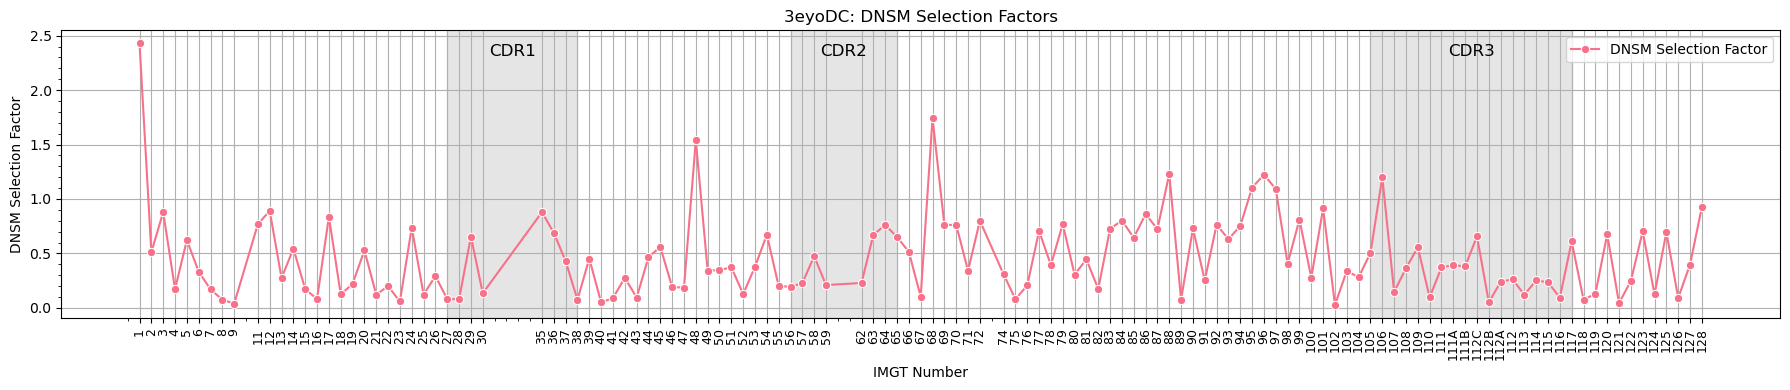

<Figure size 640x480 with 0 Axes>

In [19]:
# example plot for single pdbid with insertion codes
pdbs_table = DmsViz_Table(pdbs_df)
for abid in v3_abids:
    align_df = pdbs_table.build_aligned_df(abid)
    align_df = align_df.dropna(axis=0, how='any')
    ins_codes = [x for x in align_df.imgt_col if x.endswith(tuple(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')))]
    if len(ins_codes) == 0:
        continue
    print(f'{abid} == ins_codes: {ins_codes}')
    plot_aligned_df(
        align_df=align_df,
        title=f'{abid}: DNSM Selection Factors',
        metric_dict={
          'DNSM Selection Factor': 'dnsm_sf',
        },
        width=18,
        output_path=f"{FIGURES_OUTPUT_DIR}/{abid}_dnsm.png",
    )
    break

In [20]:
# build dms_viz json for a single v3_pdbid and single v4_pdbid
v3_abid = v3_abids[0]
v4_abid = v4_abids[0]
pdbs_table = DmsViz_Table(pdbs_df)
align_df = pdbs_table.make_diff_viz_json(
    structure_abid=v3_abid,
    v3_name=v3_abid,
    v4_name=v4_abid,
    temp_dir=f"{TEMP_DIR}",
    output_path=f"{OUTPUT_DIR}/{v3_abid}_{v4_abid}.dms_viz.json"
)
print(f"v3v4 wildtype diffs: {dict(align_df.v3v4_mut.value_counts())}")
display(align_df)

Outputting csv: "_temp/1ad0BA_1beyHL.dnsm_diff.csv"
Outputting csv: "_temp/1ad0BA_1beyHL.dnsm_v3.csv"
Outputting csv: "_temp/1ad0BA_1beyHL.dnsm_v4.csv"
Outputting csv: "_temp/1ad0BA_1beyHL.sitemap.csv"
Outputting csv: "_temp/1ad0BA_1beyHL.combined.csv"
COMMAND successful!
Outputting json: "/home/drich/shared-data/bcr-mut-sel/output/dnsm_v3v4/1ad0BA_1beyHL.dms_viz.json"
v3v4 wildtype diffs: {'-': 74, 'T': 7, 'S': 6, 'V': 5, 'Q': 4, 'P': 4, 'R': 4, 'A': 4, 'L': 2, 'F': 2, 'N': 2, 'G': 1, 'E': 1, 'D': 1, 'M': 1, 'K': 1, 'I': 1, 'H': 1}


,imgt_col,imgt_num,v3_seq,v4_seq,v3v4_seq,v3v4_mut,v3_dnsm,v4_dnsm,dnsm_diff
0,imgt_1,1,E,Q,-,Q,0.774286,0.217613,0.556673
1,imgt_2,2,V,V,V,-,0.384350,0.369352,0.014999
2,imgt_3,3,Q,Q,Q,-,0.558630,0.690199,-0.131570
3,imgt_4,4,L,L,L,-,0.214847,0.100593,0.114254
4,imgt_5,5,L,Q,-,Q,0.603231,0.668666,-0.065435
...,...,...,...,...,...,...,...,...,...
116,imgt_124,124,V,V,V,-,0.230093,0.221920,0.008173
117,imgt_125,125,T,T,T,-,0.396670,0.429592,-0.032922
118,imgt_126,126,V,V,V,-,0.071162,0.077355,-0.006193
119,imgt_127,127,S,S,S,-,0.249267,0.368691,-0.119424


In [21]:
# build mean of v3 and mean of v4 selection factors
def build_mean_df(pdbids_name, pdbids):
    df = pdbs_df[pdbs_df.pdbid.isin(pdbids)]
    pdbs_table = DmsViz_Table(pdbs_df)
    mean_df = pdbs_table.get_mean_stats_of_pdbids(
        pdbids=pdbids,
        name=pdbids_name,
        use_mode_for_wildtype=True,
    )
    return mean_df

v3_name = "v3_mean"
v4_name = "v4_mean"
v3_mean_df = build_mean_df(v3_name, v3_set[:])
v4_mean_df = build_mean_df(v4_name, v4_set[:])
# display_all(v3_mean_df)
# display_all(v4_mean_df)

mean_df = pd.concat([v3_mean_df, v4_mean_df], ignore_index=True)
mean_df = mean_df.dropna(axis=1, how="any")
display_all(mean_df)

imgt_cols = df_get_columns(mean_df, "imgt_")
v3_seq = mean_df[(mean_df.abid == v3_name) & (mean_df.stat == "wildtype")][imgt_cols].iloc[0].to_list()
v4_seq = mean_df[(mean_df.abid == v4_name) & (mean_df.stat == "wildtype")][imgt_cols].iloc[0].to_list()
print(f"v3_seq: {v3_seq}")
print(f"v4_seq: {v4_seq}")

/home/drich/matsen-lab/dnsm/dnsm-experiments-1/dnsmex/dms_viz.py:683: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seq_df[self.imgt_cols] = seq_df[self.imgt_cols].astype(str).replace('nan', pd.NA)
/home/drich/matsen-lab/dnsm/dnsm-experiments-1/dnsmex/dms_viz.py:683: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seq_df[self.imgt_cols] = seq_df[self.imgt_cols].astype(str).replace('nan', pd.NA)


imgt_col,pdbid,abid,stat,imgt_1,imgt_2,imgt_3,imgt_4,imgt_5,imgt_6,imgt_7,imgt_8,imgt_9,imgt_11,imgt_12,imgt_13,imgt_14,imgt_15,imgt_16,imgt_17,imgt_18,imgt_19,imgt_20,imgt_21,imgt_22,imgt_23,imgt_24,imgt_25,imgt_26,imgt_27,imgt_28,imgt_29,imgt_30,imgt_35,imgt_36,imgt_37,imgt_38,imgt_39,imgt_40,imgt_41,imgt_42,imgt_43,imgt_44,imgt_45,imgt_46,imgt_47,imgt_48,imgt_49,imgt_50,imgt_51,imgt_52,imgt_53,imgt_54,imgt_55,imgt_56,imgt_57,imgt_58,imgt_59,imgt_60,imgt_61,imgt_62,imgt_63,imgt_64,imgt_65,imgt_66,imgt_67,imgt_68,imgt_69,imgt_70,imgt_71,imgt_72,imgt_74,imgt_75,imgt_76,imgt_77,imgt_78,imgt_79,imgt_80,imgt_81,imgt_82,imgt_83,imgt_84,imgt_85,imgt_86,imgt_87,imgt_88,imgt_89,imgt_90,imgt_91,imgt_92,imgt_93,imgt_94,imgt_95,imgt_96,imgt_97,imgt_98,imgt_99,imgt_100,imgt_101,imgt_102,imgt_103,imgt_104,imgt_105,imgt_106,imgt_107,imgt_108,imgt_109,imgt_110,imgt_112,imgt_113,imgt_114,imgt_115,imgt_116,imgt_117,imgt_118,imgt_119,imgt_120,imgt_121,imgt_122,imgt_123,imgt_124,imgt_125,imgt_126,imgt_127,imgt_128
0,v3_mean,v3_mean,wildtype,E,V,Q,L,L,E,S,G,G,G,L,V,Q,P,G,G,S,L,R,L,S,C,A,T,S,G,F,T,F,T,D,Y,Y,M,N,W,V,R,Q,A,P,G,K,G,L,E,W,L,G,F,I,G,N,K,A,N,G,Y,T,T,E,Y,S,A,S,V,K,G,R,F,T,I,S,R,D,K,S,K,S,T,L,Y,L,Q,M,N,T,L,Q,A,E,D,S,A,I,Y,Y,C,T,R,D,R,G,L,R,F,Y,F,D,Y,W,G,Q,G,T,L,V,T,V,S,S
1,v3_mean,v3_mean,dnsm_sf,0.641165,0.647172,0.524272,0.400857,0.46204,0.286127,0.326683,0.101439,0.083503,0.581707,0.534678,0.463121,0.409908,0.199432,0.102271,0.669983,0.12237,0.177164,0.458112,0.176628,0.194228,0.024209,1.086467,0.751576,0.295885,0.323066,0.538167,1.010295,0.469401,0.719992,0.757736,0.612496,0.308429,0.35479,0.302481,0.030273,0.355821,0.036307,0.307997,0.603158,0.501018,0.270572,0.585758,0.303606,0.397946,0.321433,0.212472,0.525642,0.576604,0.454943,0.483327,0.536907,0.62567,0.881302,0.941237,0.685678,0.688925,0.813413,0.935604,0.728385,0.679809,0.29602,0.671121,0.647051,0.538548,0.389621,0.927344,0.310035,0.145922,0.245917,0.56168,0.630238,0.429761,0.426301,0.244281,0.814351,0.561987,0.879744,0.489612,0.676527,0.91624,0.637186,0.200995,0.538349,0.384104,0.798355,0.777525,0.300682,0.944511,1.335916,0.925887,0.082395,0.413426,0.270532,1.004718,0.0483,0.347203,0.086725,0.7422,0.696811,0.608588,0.828323,0.746621,0.780989,0.595245,0.498383,0.441544,0.595119,0.321744,0.936373,0.085638,0.112094,0.740532,0.026335,0.512585,0.753934,0.172593,0.58596,0.075411,0.344634,1.088288
2,v3_mean,v3_mean,rel_asa,0.825788,0.308241,0.458332,0.045948,0.407278,0.061256,0.385348,0.388079,0.319133,0.266341,0.385898,0.134063,0.523927,0.415678,0.524406,0.256732,0.414608,0.155891,0.456689,0.006355,0.184513,0.005504,0.331337,0.086269,0.355606,0.548363,0.160349,0.447328,0.01866,0.318862,0.483089,0.182435,0.180492,0.009139,0.03527,0.00276,0.04228,0.052335,0.273953,0.208461,0.597911,0.830584,0.597207,0.48973,0.521514,0.334763,0.319433,0.007829,0.003458,0.0955,0.036808,0.202004,0.25419,0.576491,0.637827,0.427234,0.393384,0.499696,0.408804,0.332415,0.419587,0.181918,0.127384,0.722237,0.376313,0.015894,0.516717,0.713837,0.136389,0.021696,0.394507,0.033656,0.30707,0.179559,0.280566,0.37082,0.679546,0.545102,0.25285,0.095748,0.004868,0.136786,0.004608,0.249916,0.007816,0.302688,0.420406,0.021737,0.411509,0.490558,0.545902,0.013197,0.188064,0.015988,0.211259,0.005272,0.191438,0.002133,0.003848,0.089775,0.109331,0.329235,0.488593,0.62035,0.579255,0.52415,0.441272,0.264996,0.365741,0.282612,0.351541,0.086041,0.589155,0.169708,0.112466,0.351762,0.010392,0.15321,0.052215,0.23054,0.62096
3,v4_mean,v4_mean,wildtype,Q,V,Q,L,Q,E,S,G,P,G,L,V,R,P,S,Q,T,L,S,L,T,C,T,V,S,G,F,T,F,T,D,F,Y,M,N,W,V,R,Q,P,P,G,R,G,L,E,W,I,G,F,I,R,D,K,A,K,G,Y,T,T,E,Y,N,P,S,V,K,G,R,V,T,M,L,V,D,T,S,K,N,Q,F,S,L,R,L,S,S,V,T,A,A,D,T,A,V,Y,Y,C,A,R,E,G,H,T,A,A,P,F,D,Y,W,G,Q,G,S,L,V,T,V,S,S
4,v4_mean,v4_mean,dnsm_sf,0.304643,0.576046,0.447946,0.322736,0.44394,0.210362,0.197757,0.120656,0.134677,0.375664,0.451656,0.372329,0.491266,0.222638,0.237104,0.438387,0.182133,0.118394,0.324266,0.100741,0.352909,0.019455,1.007321,0.466186,0.35803

v3_seq: ['E', 'V', 'Q', 'L', 'L', 'E', 'S', 'G', 'G', 'G', 'L', 'V', 'Q', 'P', 'G', 'G', 'S', 'L', 'R', 'L', 'S', 'C', 'A', 'T', 'S', 'G', 'F', 'T', 'F', 'T', 'D', 'Y', 'Y', 'M', 'N', 'W', 'V', 'R', 'Q', 'A', 'P', 'G', 'K', 'G', 'L', 'E', 'W', 'L', 'G', 'F', 'I', 'G', 'N', 'K', 'A', 'N', 'G', 'Y', 'T', 'T', 'E', 'Y', 'S', 'A', 'S', 'V', 'K', 'G', 'R', 'F', 'T', 'I', 'S', 'R', 'D', 'K', 'S', 'K', 'S', 'T', 'L', 'Y', 'L', 'Q', 'M', 'N', 'T', 'L', 'Q', 'A', 'E', 'D', 'S', 'A', 'I', 'Y', 'Y', 'C', 'T', 'R', 'D', 'R', 'G', 'L', 'R', 'F', 'Y', 'F', 'D', 'Y', 'W', 'G', 'Q', 'G', 'T', 'L', 'V', 'T', 'V', 'S', 'S']
v4_seq: ['Q', 'V', 'Q', 'L', 'Q', 'E', 'S', 'G', 'P', 'G', 'L', 'V', 'R', 'P', 'S', 'Q', 'T', 'L', 'S', 'L', 'T', 'C', 'T', 'V', 'S', 'G', 'F', 'T', 'F', 'T', 'D', 'F', 'Y', 'M', 'N', 'W', 'V', 'R', 'Q', 'P', 'P', 'G', 'R', 'G', 'L', 'E', 'W', 'I', 'G', 'F', 'I', 'R', 'D', 'K', 'A', 'K', 'G', 'Y', 'T', 'T', 'E', 'Y', 'N', 'P', 'S', 'V', 'K', 'G', 'R', 'V', 'T', 'M', 'L', 'V', 'D', 'T

In [22]:
# build dms-viz of v3/v4 means
mean_table = DmsViz_Table(mean_df)
mean_diff_df = mean_table.build_aligned_diff_df(v3_name, v4_name)
mean_diff_df = mean_table.make_diff_viz_json(
    structure_abid='1ad0BA',
    v3_name=v3_name,
    v4_name=v4_name,
    temp_dir=f"{TEMP_DIR}",
    output_path=f'{OUTPUT_DIR}/{v3_name}_{v4_name}.dms_viz.json'
)
display(mean_diff_df)

Outputting csv: "_temp/v3_mean_v4_mean.dnsm_diff.csv"
Outputting csv: "_temp/v3_mean_v4_mean.dnsm_v3.csv"
Outputting csv: "_temp/v3_mean_v4_mean.dnsm_v4.csv"
Outputting csv: "_temp/v3_mean_v4_mean.sitemap.csv"
Outputting csv: "_temp/v3_mean_v4_mean.combined.csv"
COMMAND successful!
Outputting json: "/home/drich/shared-data/bcr-mut-sel/output/dnsm_v3v4/v3_mean_v4_mean.dms_viz.json"


,imgt_col,imgt_num,v3_seq,v4_seq,v3v4_seq,v3v4_mut,v3_dnsm,v4_dnsm,dnsm_diff
0,imgt_1,1,E,Q,-,Q,0.641165,0.304643,0.336522
1,imgt_2,2,V,V,V,-,0.647172,0.576046,0.071126
2,imgt_3,3,Q,Q,Q,-,0.524272,0.447946,0.076326
3,imgt_4,4,L,L,L,-,0.400857,0.322736,0.078121
4,imgt_5,5,L,Q,-,Q,0.462040,0.443940,0.018100
...,...,...,...,...,...,...,...,...,...
116,imgt_124,124,V,V,V,-,0.172593,0.201255,-0.028661
117,imgt_125,125,T,T,T,-,0.585960,0.569072,0.016888
118,imgt_126,126,V,V,V,-,0.075411,0.091536,-0.016125
119,imgt_127,127,S,S,S,-,0.344634,0.354498,-0.009864


In [23]:
# load rodriguez data (relabeling columns to conform with align_df)
rodriguez_path = "../../data/dnsm_wig_1m-v1wyatt+v1tang-joint-ON-v1rodriguez-sites-V3-V4-diff.csv"
rodriguez_df = pd.read_csv(rodriguez_path)
rodriguez_df["dnsm_diff"] = rodriguez_df["mean_selection_factor"]
rodriguez_df["imgt_col"] = [f"imgt_{x}" for x in rodriguez_df.site]
rodriguez_df["imgt_num"] = [int(x.rstrip('ABCDEFGHIJKLMNOPQRSTUVWXYZ')) for x in rodriguez_df.site]
rodriguez_df = rodriguez_df.sort_values(by="imgt_col", key=lambda x: x.map(DmsViz_Utility.sort_imgt_nums))
display(rodriguez_df)

,site,is_cdr,mean_prob,mean_neutral_prob,mean_selection_factor,mut_freq,dnsm_diff,imgt_col,imgt_num
0,1,False,0.035094,-0.005745,0.485913,0.012200,0.485913,imgt_1,1
1,2,False,-0.008508,0.006998,-0.163713,0.011423,-0.163713,imgt_2,2
2,3,False,0.009066,-0.005518,0.068667,0.006355,0.068667,imgt_3,3
3,4,False,0.014351,0.021544,0.125778,0.007471,0.125778,imgt_4,4
4,5,False,-0.003125,-0.021410,0.044308,-0.007757,0.044308,imgt_5,5
...,...,...,...,...,...,...,...,...,...
122,124,False,-0.003470,-0.001627,-0.066780,-0.007227,-0.066780,imgt_124,124
123,125,False,-0.001791,-0.001270,-0.012399,-0.004389,-0.012399,imgt_125,125
124,126,False,-0.001295,-0.000578,-0.022545,-0.001898,-0.022545,imgt_126,126
125,127,False,-0.000773,-0.000593,-0.013487,-0.000658,-0.013487,imgt_127,127


figure saved to: /home/drich/shared-data/bcr-mut-sel/output/dnsm_v3v4/rodriguez_v3v4_mean_difference.png


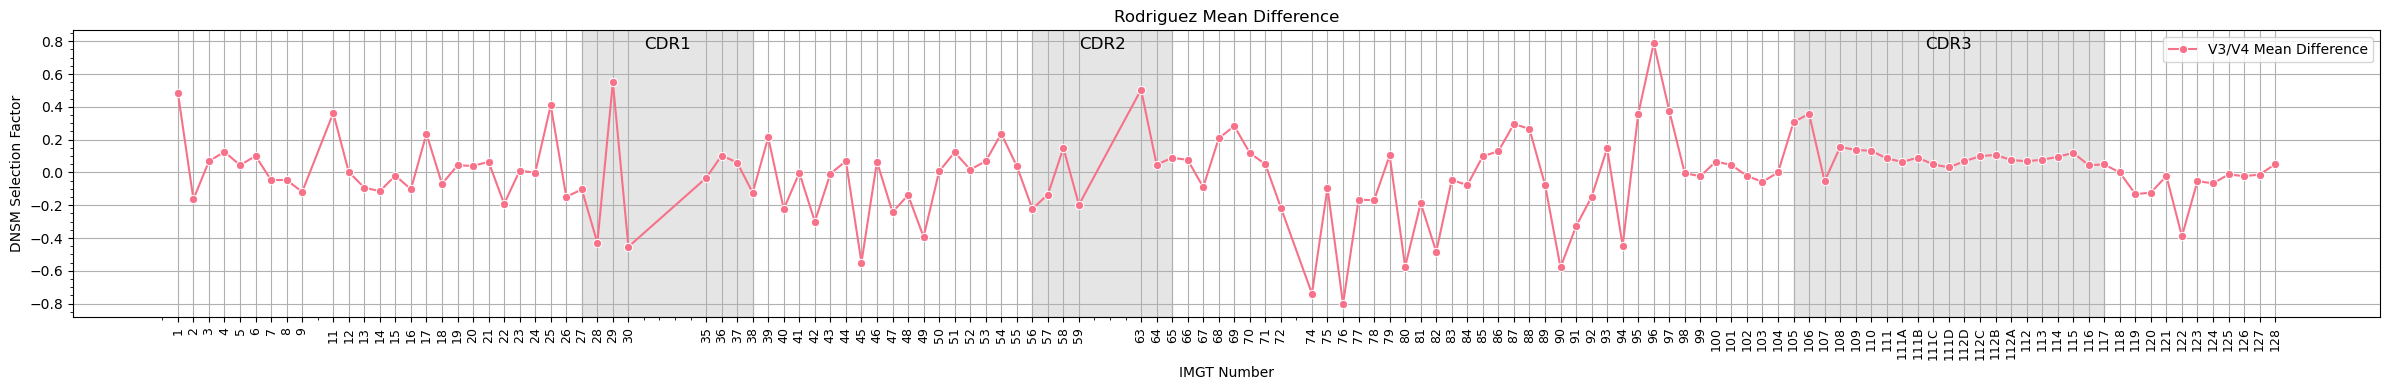

<Figure size 640x480 with 0 Axes>

In [24]:
# plot rodriguez mean difference
plot_aligned_df(
  align_df=rodriguez_df,
  title="Rodriguez Mean Difference",
  metric_dict={
    "V3/V4 Mean Difference": "mean_selection_factor"
  },
  width=24,
  # all_imgt_labels=True,
  output_path=f"{FIGURES_OUTPUT_DIR}/rodriguez_v3v4_mean_difference.png"
)

In [25]:
# merge sabdab and rodriguez data
sabdab_rodrig_df = DmsViz_Table.append_data_to_aligned_df(
  align_df=mean_diff_df,
  data_df=rodriguez_df,
  data_metrics=['rodriguez_diff'],
  align_relabel={
    'dnsm_diff': 'sabdab_diff'
  },
  data_relabel={
    'dnsm_diff': 'rodriguez_diff'
  },
  merge_how='inner'
)

display(sabdab_rodrig_df)

,imgt_col,imgt_num,v3_seq,v4_seq,v3v4_seq,v3v4_mut,v3_dnsm,v4_dnsm,sabdab_diff,rodriguez_diff
0,imgt_1,1,E,Q,-,Q,0.641165,0.304643,0.336522,0.485913
1,imgt_2,2,V,V,V,-,0.647172,0.576046,0.071126,-0.163713
2,imgt_3,3,Q,Q,Q,-,0.524272,0.447946,0.076326,0.068667
3,imgt_4,4,L,L,L,-,0.400857,0.322736,0.078121,0.125778
4,imgt_5,5,L,Q,-,Q,0.462040,0.443940,0.018100,0.044308
...,...,...,...,...,...,...,...,...,...,...
113,imgt_124,124,V,V,V,-,0.172593,0.201255,-0.028661,-0.066780
114,imgt_125,125,T,T,T,-,0.585960,0.569072,0.016888,-0.012399
115,imgt_126,126,V,V,V,-,0.075411,0.091536,-0.016125,-0.022545
116,imgt_127,127,S,S,S,-,0.344634,0.354498,-0.009864,-0.013487


figure saved to: /home/drich/shared-data/bcr-mut-sel/output/dnsm_v3v4/sabdab_rodriguez_v3v4_mean_difference.png


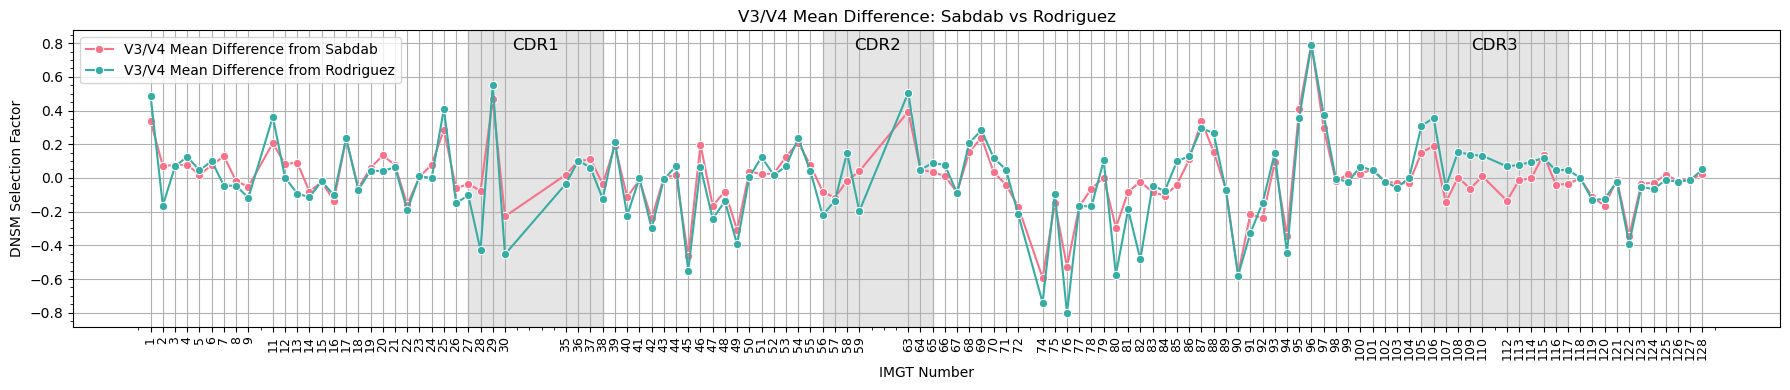

figure saved to: /home/drich/shared-data/bcr-mut-sel/output/dnsm_v3v4/v3v4_mean_selection_factor.png


<Figure size 640x480 with 0 Axes>

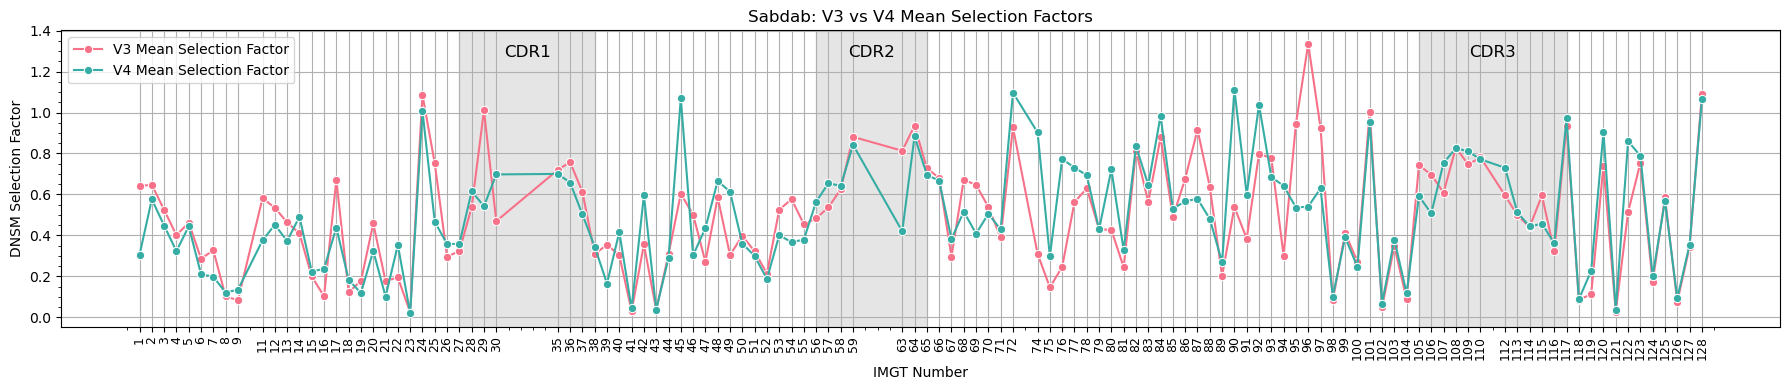

<Figure size 640x480 with 0 Axes>

In [26]:
# plot line graphs for:
# (1) sabdab vs rodriguez v3/v4 mean difference
# (2) sabdab's v3 and v4 mean selection factors

plot_aligned_df(
    align_df=sabdab_rodrig_df,
    title='V3/V4 Mean Difference: Sabdab vs Rodriguez',
    metric_dict={
      'V3/V4 Mean Difference from Sabdab': 'sabdab_diff',
      'V3/V4 Mean Difference from Rodriguez': 'rodriguez_diff'
    },
    width=18,
    output_path=f"{FIGURES_OUTPUT_DIR}/sabdab_rodriguez_v3v4_mean_difference.png",
)

plot_aligned_df(
    align_df=sabdab_rodrig_df,
    title='Sabdab: V3 vs V4 Mean Selection Factors',
    metric_dict={
      'V3 Mean Selection Factor': 'v3_dnsm',
      'V4 Mean Selection Factor': 'v4_dnsm',
    },
    width=18,
    output_path=f"{FIGURES_OUTPUT_DIR}/v3v4_mean_selection_factor.png",
)

In [27]:
# build dms-viz json for comparison of sabdab and rodriguez differences.
metric_cols = [
    "rodriguez_diff",
    "sabdab_diff",
]
metric_names = [
    "V3/V4 Rodriguez Mean Selection Factor",
    "V3/V4 Sabdab Mean Selection Factor",
]

sabdab_vs_rodriguez_df = DmsViz_Table.make_viz_json(
    title="V3/V4 Mean Difference: Sabdab vs Rodriguez",
    name="sabdab_rodriguez",
    structure_abid="1ad0BA",
    align_df=sabdab_rodrig_df,
    seq_col="v3_seq",
    mut_col="v3v4_mut",
    metric_cols=metric_cols,
    metric_names=metric_names,
    temp_dir=f"{TEMP_DIR}",
    output_path=f"{OUTPUT_DIR}/sabdab_rodriguez.dms_viz.json",
)
display(sabdab_vs_rodriguez_df)

Outputting csv: "_temp/sabdab_rodriguez.rodriguez_diff.csv"
Outputting csv: "_temp/sabdab_rodriguez.sabdab_diff.csv"
Outputting csv: "_temp/sabdab_rodriguez.sitemap.csv"
Outputting csv: "_temp/sabdab_rodriguez.combined.csv"
COMMAND successful!
Outputting json: "/home/drich/shared-data/bcr-mut-sel/output/dnsm_v3v4/sabdab_rodriguez.dms_viz.json"


,imgt_col,imgt_num,v3_seq,v4_seq,v3v4_seq,v3v4_mut,v3_dnsm,v4_dnsm,sabdab_diff,rodriguez_diff,imgt_num_padded
0,imgt_1,1,E,Q,-,Q,0.641165,0.304643,0.336522,0.485913,1
1,imgt_2,2,V,V,V,-,0.647172,0.576046,0.071126,-0.163713,2
2,imgt_3,3,Q,Q,Q,-,0.524272,0.447946,0.076326,0.068667,3
3,imgt_4,4,L,L,L,-,0.400857,0.322736,0.078121,0.125778,4
4,imgt_5,5,L,Q,-,Q,0.462040,0.443940,0.018100,0.044308,5
...,...,...,...,...,...,...,...,...,...,...,...
113,imgt_124,124,V,V,V,-,0.172593,0.201255,-0.028661,-0.066780,124
114,imgt_125,125,T,T,T,-,0.585960,0.569072,0.016888,-0.012399,125
115,imgt_126,126,V,V,V,-,0.075411,0.091536,-0.016125,-0.022545,126
116,imgt_127,127,S,S,S,-,0.344634,0.354498,-0.009864,-0.013487,127
